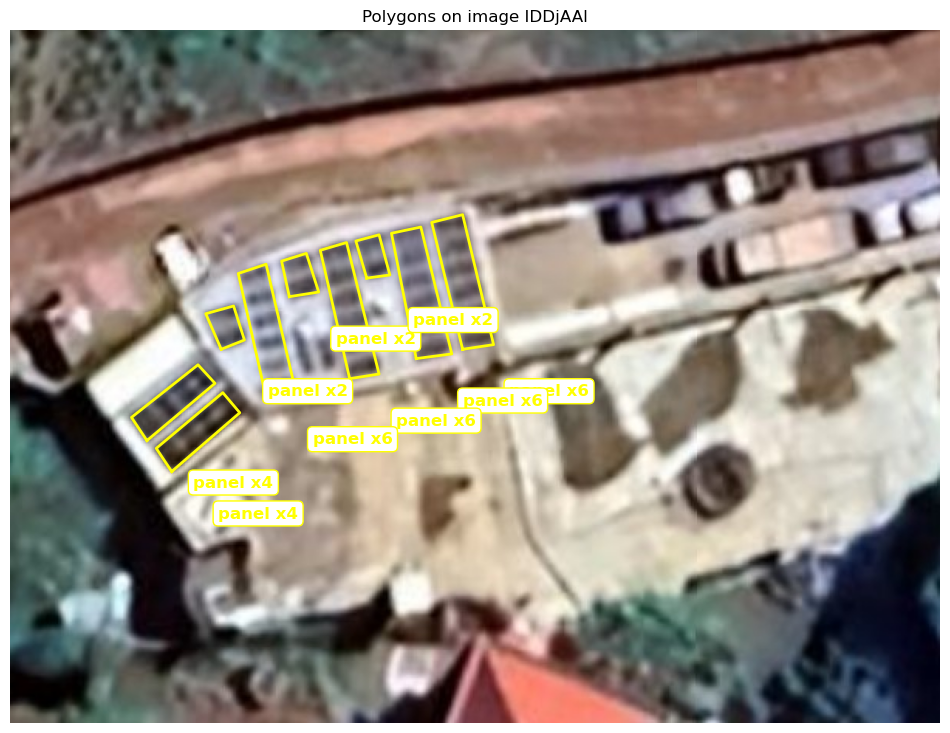

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import ast
import os

# Path to CSV and image folder
csv_path = '/Users/joaop.cardoso/MestradoCD/CAA/Project 1/Lacuna-solar/Train.csv'
image_folder = '/Users/joaop.cardoso/MestradoCD/CAA/Project 1/images'
image_id = 'IDDjAAl'

# Load CSV
df = pd.read_csv(csv_path)

# Filter rows matching the specific image ID
image_data = df[df['ID'] == image_id]

# Load the image
image_path = os.path.join(image_folder, image_id + '.jpg')  # adjust extension if needed
image = Image.open(image_path)

# Plot image
plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.axis('off')

# Overlay polygons with labels
for _, row in image_data.iterrows():
    polygon = ast.literal_eval(row['polygon'])
    x, y = zip(*polygon)
    
    # Determine if this is a boiler or panel
    if row['boil_nbr'] > 0:
        color = 'blue'
        label = f"boiler x{row['boil_nbr']}"
        label_x, label_y = x[0], y[0]
    elif row['pan_nbr'] > 0:
        color = 'yellow'
        label = f"panel x{row['pan_nbr']}"
        label_x, label_y = x[0] + 30, y[0] + 30  # offset label for panel
    else:
        continue  # skip if neither

    # Draw polygon
    plt.plot(x + (x[0],), y + (y[0],), color=color, linewidth=2)

    # Label the polygon
    plt.text(label_x, label_y, label, color=color, fontsize=12, weight='bold',
             bbox=dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.3'))

plt.title(f"Polygons on image {image_id}")
plt.show()



In [24]:
df = pd.read_csv("/Users/joaop.cardoso/MestradoCD/CAA/Project 1/Lacuna-solar/Train.csv")
df.head()

,ID,img_origin,placement,boil_nbr,pan_nbr,polygon
0,ID00rw8,D,roof,0,2,"[(2087, 2179.0), (2181, 2191.0), (2171, 2223.0..."
1,ID014O6EC7,D,roof,0,1,"[(1327, 1574.0), (1595, 1308.0), (2169, 1744.0..."
2,ID020cu0z,D,openspace,0,1,"[(2215, 1372.0), (2400, 1422.0), (2316, 1716.0..."
3,ID024YTBkLvRpQahT,D,roof,0,1,"[(1574, 526.0), (1698, 366.0), (1810, 422.0), ..."
4,ID024YTBkLvRpQahT,D,roof,0,2,"[(1402, 782.0), (1814, 854.0), (1726, 1074.0),..."
